In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [170]:
# Loading and reading the data
data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')

#Assumes tge last column contains the target variable ang the first column contains the time information
print(data.head())

   Unnamed: 0  542644    548869      93219  534737   36820  542661    10066  \
0    19910101  216.04  404.7017  146.25000  281.38  155.25  214.43  268.750   
1    19910201  149.08  421.4927  115.66667  276.26   95.75  140.63  280.000   
2    19910301  119.05  368.1324   86.33333  190.79   80.80  107.51  199.200   
3    19910401  121.94  387.0115   79.66667  200.27   77.00  110.70  191.375   
4    19910501  125.79  462.6200   82.80000  199.64   78.60  114.96  197.200   

   542456   24820  ...  543880+543332+542784+530997+530785  \
0  204.91  312.13  ...                            33122.13   
1  136.65  307.28  ...                            56664.57   
2  106.03  226.21  ...                            35121.18   
3  108.98  235.20  ...                            19576.48   
4  112.91  234.61  ...                            34175.28   

   535034+535038+542800+543348+543896  543924+543376+542828+535086  \
0                            45839.53                     52842.86   
1           

In [171]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Columns: 464 entries, Unnamed: 0 to 8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132
dtypes: float64(463), int64(1)
memory usage: 1.4 MB
None


In [172]:
print(data.describe())


         Unnamed: 0      542644       548869       93219       534737  \
count  3.970000e+02  397.000000   397.000000  397.000000   397.000000   
mean   2.007108e+07  400.910945   496.835986  299.134446   524.961182   
std    9.559870e+04  238.792371   286.499952  192.982836   334.962908   
min    1.991010e+07  106.490000   171.250000   57.500000   112.550000   
25%    1.999040e+07  174.530000   374.247600  118.750000   208.230000   
50%    2.007070e+07  357.040000   427.074400  279.900000   490.250000   
75%    2.015100e+07  585.437500   505.130000  443.500000   732.490000   
max    2.024010e+07  964.875000  3079.875000  742.125000  1544.562500   

            36820       542661        10066       542456        24820  ...  \
count  397.000000   397.000000   397.000000   397.000000   397.000000  ...   
mean   298.694691   418.230372   519.167828   393.371102   543.162305  ...   
std    193.505792   263.583195   310.896603   243.546288   317.206247  ...   
min     61.400000    93.670000

In [173]:
#This is separating features (X) and target variable (y)
X = data.drop(columns=['67321'])
y = data['67321']

In [174]:
# Split the dataset into training and test sets
X_train, X_test = X[:-36], X[-36:]
y_train, y_test = y[:-36], y[-36:]

In [175]:
from sklearn.neural_network import MLPRegressor

# Initialize MLP Regressor
mlp_regressor =MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

#mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
#mlp_regressor.fit(X_train, y_train)

In [176]:
# Train the MLP Regressor
mlp_regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [177]:
#Evaluate the model
predictions_train = mlp_regressor.predict(X_train)
predictions_test = mlp_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (MSE) on training set:", mse_train)
print("Mean Squared Error (MSE) on testing set:", mse_test)


Mean Squared Error (MSE) on training set: 735034804.7540836
Mean Squared Error (MSE) on testing set: 2816852811.7431316


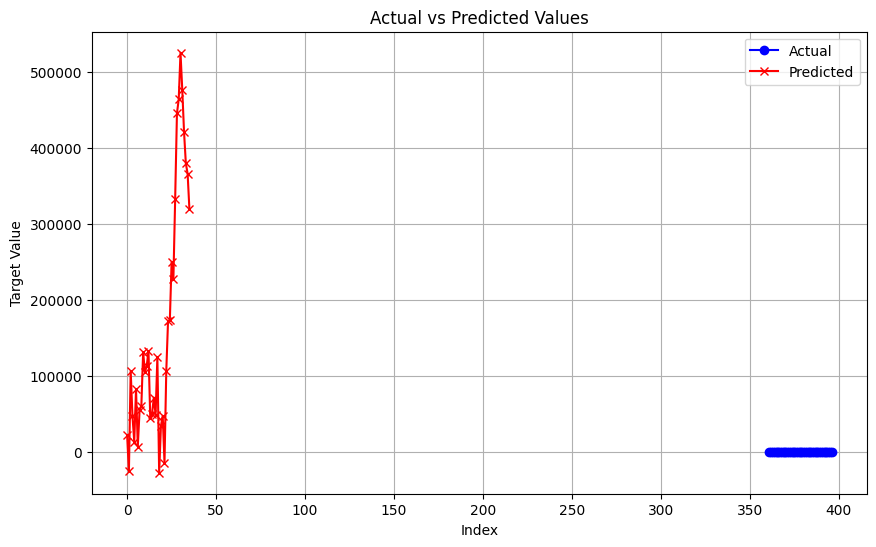

In [178]:
import matplotlib.pyplot as plt

# Make predictions using the MLP Regressor
predictions = mlp_regressor.predict(X_test)

# Visualization of training and testing sets
#plt.figure(figsize=(10, 5))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

plt.plot(y_test, label='Actual', color='blue', marker='o')
plt.plot(predictions, label='Predicted', color='red', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Target Value')

plt.legend()

plt.grid(True)

plt.show()


Text(0, 0.5, 'Predicted')

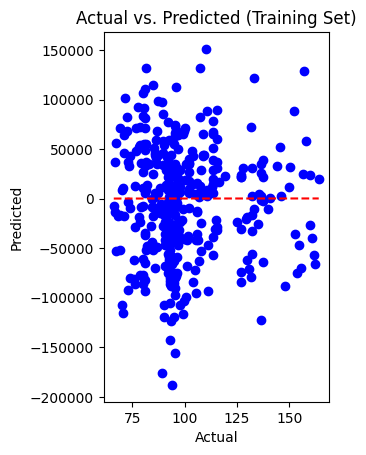

In [179]:
# Plot actual vs. predicted values for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, predictions_train, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')
plt.title('Actual vs. Predicted (Training Set)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

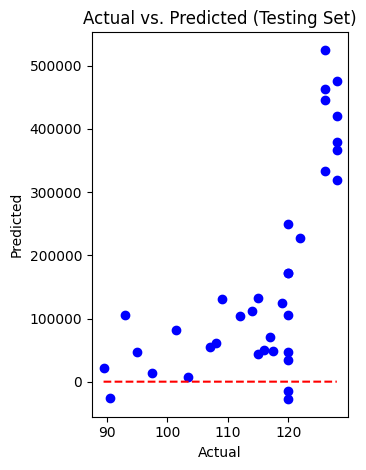

In [180]:
# Plot actual vs. predicted values for testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs. Predicted (Testing Set)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

In [181]:
# Evaluate the model
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_train = mean_squared_error(y_train, predictions_train, squared=False)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print("Training Set Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r2_train)


Training Set Metrics:
Mean Absolute Error: 45747.297097242306
Mean Squared Error: 3244027269.8807898
Root Mean Squared Error: 56956.36285684673
R-squared: -7414941.514511556


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
